In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
nc_19 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_19.csv')
nc_18 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_18.csv')
nc_17 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_17.csv')
nc_16 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_16.csv')
nc_15 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_15.csv')
print(nc_19.head(), nc_18.head(), nc_17.head(), nc_16.head(), nc_15.head())


   Unnamed: 0        GEOID  tpop  pnhwhite19   pnhasn19   pnhblk19    phisp19  \
0           1  37183050300  3350   85.611940   2.238806   8.567164   1.671642   
1           2  37067002701  6700   26.626866   0.000000  41.985075  31.000000   
2           3  37119005518  5359   33.756298  15.525285  40.156746   8.154506   
3           4  37051003309  6546   41.964559   5.545371  31.622365  12.496181   
4           5  37183053723  3401   74.242870   3.910614   8.938548   9.761835   

   nhwhite  nhasn  nhblk  ...  tpopfml50to54  tpopfml55to59  tpopfml60to61  \
0     2868     75    287  ...             41             20             44   
1     1784      0   2813  ...            226            221             36   
2     1809    832   2152  ...            148            133             53   
3     2747    363   2070  ...            199            191             62   
4     2525    133    304  ...             91             76             93   

   tpopfml62to64  tpopfml65to66  tpopfml67to

In [362]:
nc_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     435 non-null    int64  
 1   GEOID          435 non-null    int64  
 2   tpop           435 non-null    int64  
 3   pnhwhite19     430 non-null    float64
 4   pnhasn19       430 non-null    float64
 5   pnhblk19       430 non-null    float64
 6   phisp19        430 non-null    float64
 7   nhwhite        435 non-null    int64  
 8   nhasn          435 non-null    int64  
 9   nhblk          435 non-null    int64  
 10  hisp           435 non-null    int64  
 11  medinc19       425 non-null    float64
 12  rent19         422 non-null    float64
 13  houseval19     418 non-null    float64
 14  pcol19         430 non-null    float64
 15  tpop2          435 non-null    int64  
 16  tpopml         435 non-null    int64  
 17  tpopmlt5       435 non-null    int64  
 18  tpopml5to9

In [363]:
missing = pd.concat([nc_19.isnull().sum(), 100 * nc_19.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
tpopml65to66,0,0.000000
tpopml67to69,0,0.000000
tpopml70to74,0,0.000000
tpopml75to79,0,0.000000
...,...,...
pnhasn19,5,1.149425
pnhwhite19,5,1.149425
medinc19,10,2.298851
rent19,13,2.988506


In [364]:
nc_19.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite19', 'pnhasn19', 'pnhblk19',
       'phisp19', 'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc19', 'rent19',
       'houseval19', 'pcol19', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9',
       'tpopml10to14', 'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21',
       'tpopml22to24', 'tpopml25to29', 'tpopml30to34', 'tpopml35to39',
       'tpopml40to44', 'tpopml45to49', 'tpopml50to54', 'tpopml55to59',
       'tpopml60to61', 'tpopml62to64', 'tpopml65to66', 'tpopml67to69',
       'tpopml70to74', 'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml',
       'tpopfmlt5', 'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17',
       'tpopfml18to19', 'tpopfml20', 'tpopfml21', 'tpopfml22to24',
       'tpopfml25to29', 'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44',
       'tpopfml45to49', 'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61',
       'tpopfml62to64', 'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74',
       'tpopfml75to79', 'tpopfml80to85

In [365]:
nc_19['Percent of Total Population Male'] = nc_19['tpopml']/nc_19['tpop2']
nc_19['Percent of Male Population Under 10'] = (nc_19['tpopmlt5']+nc_19['tpopml5to9'])/nc_19['tpopml']
nc_19['Percent of Male Population 10 to 14'] = (nc_19['tpopml10to14']+nc_19['tpopml15to17'])/nc_19['tpopml']
nc_19['Percent of Male Population 18 to 21'] = (nc_19['tpopml18to19']+nc_19['tpopml20']+nc_19['tpopml21'])/nc_19['tpopml']
nc_19['Percent of Male Population 22 to 29'] = (nc_19['tpopml22to24'] + nc_19['tpopml25to29'])/nc_19['tpopml']
nc_19['Percent of Male Population 30 to 39'] = (nc_19['tpopml30to34']+nc_19['tpopml35to39'])/nc_19['tpopml']
nc_19['Percent of Male Population 40 to 54'] = (nc_19['tpopml50to54']+nc_19['tpopml45to49']+nc_19['tpopml40to44'])/nc_19['tpopml']
nc_19['Percent of Male Population 55 to 64'] = (nc_19['tpopml60to61']+nc_19['tpopml62to64']+nc_19['tpopml55to59'])/nc_19['tpopml']
nc_19['Percent of Male Population 65 to 74'] = (nc_19['tpopml67to69']+nc_19['tpopml70to74']+nc_19['tpopml65to66'])/nc_19['tpopml']
nc_19['Percent of Male Population 75 to 85'] = (nc_19['tpopml80to85']+nc_19['tpopml75to79'])/nc_19['tpopml']
nc_19['Percent of Male Population Over 85'] = nc_19['tpopmlgt85']/nc_19['tpopml']


In [366]:
nc_19['Percent of Total Population Female'] = nc_19['tpopfml']/nc_19['tpop2']
nc_19['Percent of Female Population Under 10'] = (nc_19['tpopfmlt5']+nc_19['tpopfml5to9'])/nc_19['tpopfml']
nc_19['Percent of Female Population 10 to 14'] = (nc_19['tpopfml10to14']+nc_19['tpopfml15to17'])/nc_19['tpopfml']
nc_19['Percent of Female Population 18 to 21'] = (nc_19['tpopfml18to19']+nc_19['tpopfml20']+nc_19['tpopfml21'])/nc_19['tpopfml']
nc_19['Percent of Female Population 22 to 29'] = (nc_19['tpopfml22to24'] + nc_19['tpopfml25to29'])/nc_19['tpopfml']
nc_19['Percent of Female Population 30 to 39'] = (nc_19['tpopfml30to34']+nc_19['tpopfml35to39'])/nc_19['tpopfml']
nc_19['Percent of Female Population 40 to 54'] = (nc_19['tpopfml50to54']+nc_19['tpopfml45to49']+nc_19['tpopfml40to44'])/nc_19['tpopfml']
nc_19['Percent of Female Population 55 to 64'] = (nc_19['tpopfml60to61']+nc_19['tpopfml62to64']+nc_19['tpopfml55to59'])/nc_19['tpopfml']
nc_19['Percent of Female Population 65 to 74'] = (nc_19['tpopfml67to69']+nc_19['tpopfml70to74']+nc_19['tpopfml65to66'])/nc_19['tpopfml']
nc_19['Percent of Female Population 75 to 85'] = (nc_19['tpopfml80to85']+nc_19['tpopfml75to79'])/nc_19['tpopfml']
nc_19['Percent of Female Population Over 85'] = nc_19['tpopfmlgt85']/nc_19['tpopfml']
nc_19['Year'] = 2019

In [367]:
nc_18['Percent of Total Population Male'] = nc_18['tpopml']/nc_18['tpop2']
nc_18['Percent of Male Population Under 10'] = (nc_18['tpopmlt5']+nc_18['tpopml5to9'])/nc_18['tpopml']
nc_18['Percent of Male Population 10 to 14'] = (nc_18['tpopml10to14']+nc_18['tpopml15to17'])/nc_18['tpopml']
nc_18['Percent of Male Population 18 to 21'] = (nc_18['tpopml18to19']+nc_18['tpopml20']+nc_18['tpopml21'])/nc_18['tpopml']
nc_18['Percent of Male Population 22 to 29'] = (nc_18['tpopml22to24'] + nc_18['tpopml25to29'])/nc_18['tpopml']
nc_18['Percent of Male Population 30 to 39'] = (nc_18['tpopml30to34']+nc_18['tpopml35to39'])/nc_18['tpopml']
nc_18['Percent of Male Population 40 to 54'] = (nc_18['tpopml50to54']+nc_18['tpopml45to49']+nc_18['tpopml40to44'])/nc_18['tpopml']
nc_18['Percent of Male Population 55 to 64'] = (nc_18['tpopml60to61']+nc_18['tpopml62to64']+nc_18['tpopml55to59'])/nc_18['tpopml']
nc_18['Percent of Male Population 65 to 74'] = (nc_18['tpopml67to69']+nc_18['tpopml70to74']+nc_18['tpopml65to66'])/nc_18['tpopml']
nc_18['Percent of Male Population 75 to 85'] = (nc_18['tpopml80to85']+nc_18['tpopml75to79'])/nc_18['tpopml']
nc_18['Percent of Male Population Over 85'] = nc_18['tpopmlgt85']/nc_18['tpopml']


In [368]:
nc_18['Percent of Total Population Female'] = nc_18['tpopfml']/nc_18['tpop2']
nc_18['Percent of Female Population Under 10'] = (nc_18['tpopfmlt5']+nc_18['tpopfml5to9'])/nc_18['tpopfml']
nc_18['Percent of Female Population 10 to 14'] = (nc_18['tpopfml10to14']+nc_18['tpopfml15to17'])/nc_18['tpopfml']
nc_18['Percent of Female Population 18 to 21'] = (nc_18['tpopfml18to19']+nc_18['tpopfml20']+nc_18['tpopfml21'])/nc_18['tpopfml']
nc_18['Percent of Female Population 22 to 29'] = (nc_18['tpopfml22to24'] + nc_18['tpopfml25to29'])/nc_18['tpopfml']
nc_18['Percent of Female Population 30 to 39'] = (nc_18['tpopfml30to34']+nc_18['tpopfml35to39'])/nc_18['tpopfml']
nc_18['Percent of Female Population 40 to 54'] = (nc_18['tpopfml50to54']+nc_18['tpopfml45to49']+nc_18['tpopfml40to44'])/nc_18['tpopfml']
nc_18['Percent of Female Population 55 to 64'] = (nc_18['tpopfml60to61']+nc_18['tpopfml62to64']+nc_18['tpopfml55to59'])/nc_18['tpopfml']
nc_18['Percent of Female Population 65 to 74'] = (nc_18['tpopfml67to69']+nc_18['tpopfml70to74']+nc_18['tpopfml65to66'])/nc_18['tpopfml']
nc_18['Percent of Female Population 75 to 85'] = (nc_18['tpopfml80to85']+nc_18['tpopfml75to79'])/nc_18['tpopfml']
nc_18['Percent of Female Population Over 85'] = nc_18['tpopfmlgt85']/nc_18['tpopfml']
nc_18['Year'] = 2018

In [369]:
nc_17['Percent of Total Population Male'] = nc_17['tpopml']/nc_17['tpop2']
nc_17['Percent of Male Population Under 10'] = (nc_17['tpopmlt5']+nc_17['tpopml5to9'])/nc_17['tpopml']
nc_17['Percent of Male Population 10 to 14'] = (nc_17['tpopml10to14']+nc_17['tpopml15to17'])/nc_17['tpopml']
nc_17['Percent of Male Population 18 to 21'] = (nc_17['tpopml18to19']+nc_17['tpopml20']+nc_17['tpopml21'])/nc_17['tpopml']
nc_17['Percent of Male Population 22 to 29'] = (nc_17['tpopml22to24'] + nc_17['tpopml25to29'])/nc_17['tpopml']
nc_17['Percent of Male Population 30 to 39'] = (nc_17['tpopml30to34']+nc_17['tpopml35to39'])/nc_17['tpopml']
nc_17['Percent of Male Population 40 to 54'] = (nc_17['tpopml50to54']+nc_17['tpopml45to49']+nc_17['tpopml40to44'])/nc_17['tpopml']
nc_17['Percent of Male Population 55 to 64'] = (nc_17['tpopml60to61']+nc_17['tpopml62to64']+nc_17['tpopml55to59'])/nc_17['tpopml']
nc_17['Percent of Male Population 65 to 74'] = (nc_17['tpopml67to69']+nc_17['tpopml70to74']+nc_17['tpopml65to66'])/nc_17['tpopml']
nc_17['Percent of Male Population 75 to 85'] = (nc_17['tpopml80to85']+nc_17['tpopml75to79'])/nc_17['tpopml']
nc_17['Percent of Male Population Over 85'] = nc_17['tpopmlgt85']/nc_17['tpopml']


In [370]:
nc_17['Percent of Total Population Female'] = nc_17['tpopfml']/nc_17['tpop2']
nc_17['Percent of Female Population Under 10'] = (nc_17['tpopfmlt5']+nc_17['tpopfml5to9'])/nc_17['tpopfml']
nc_17['Percent of Female Population 10 to 14'] = (nc_17['tpopfml10to14']+nc_17['tpopfml15to17'])/nc_17['tpopfml']
nc_17['Percent of Female Population 18 to 21'] = (nc_17['tpopfml18to19']+nc_17['tpopfml20']+nc_17['tpopfml21'])/nc_17['tpopfml']
nc_17['Percent of Female Population 22 to 29'] = (nc_17['tpopfml22to24'] + nc_17['tpopfml25to29'])/nc_17['tpopfml']
nc_17['Percent of Female Population 30 to 39'] = (nc_17['tpopfml30to34']+nc_17['tpopfml35to39'])/nc_17['tpopfml']
nc_17['Percent of Female Population 40 to 54'] = (nc_17['tpopfml50to54']+nc_17['tpopfml45to49']+nc_17['tpopfml40to44'])/nc_17['tpopfml']
nc_17['Percent of Female Population 55 to 64'] = (nc_17['tpopfml60to61']+nc_17['tpopfml62to64']+nc_17['tpopfml55to59'])/nc_17['tpopfml']
nc_17['Percent of Female Population 65 to 74'] = (nc_17['tpopfml67to69']+nc_17['tpopfml70to74']+nc_17['tpopfml65to66'])/nc_17['tpopfml']
nc_17['Percent of Female Population 75 to 85'] = (nc_17['tpopfml80to85']+nc_17['tpopfml75to79'])/nc_17['tpopfml']
nc_17['Percent of Female Population Over 85'] = nc_17['tpopfmlgt85']/nc_17['tpopfml']
nc_17['Year'] = 2017

In [371]:
nc_16['Percent of Total Population Male'] = nc_16['tpopml']/nc_16['tpop2']
nc_16['Percent of Male Population Under 10'] = (nc_16['tpopmlt5']+nc_16['tpopml5to9'])/nc_16['tpopml']
nc_16['Percent of Male Population 10 to 14'] = (nc_16['tpopml10to14']+nc_16['tpopml15to17'])/nc_16['tpopml']
nc_16['Percent of Male Population 18 to 21'] = (nc_16['tpopml18to19']+nc_16['tpopml20']+nc_16['tpopml21'])/nc_16['tpopml']
nc_16['Percent of Male Population 22 to 29'] = (nc_16['tpopml22to24'] + nc_16['tpopml25to29'])/nc_16['tpopml']
nc_16['Percent of Male Population 30 to 39'] = (nc_16['tpopml30to34']+nc_16['tpopml35to39'])/nc_16['tpopml']
nc_16['Percent of Male Population 40 to 54'] = (nc_16['tpopml50to54']+nc_16['tpopml45to49']+nc_16['tpopml40to44'])/nc_16['tpopml']
nc_16['Percent of Male Population 55 to 64'] = (nc_16['tpopml60to61']+nc_16['tpopml62to64']+nc_16['tpopml55to59'])/nc_16['tpopml']
nc_16['Percent of Male Population 65 to 74'] = (nc_16['tpopml67to69']+nc_16['tpopml70to74']+nc_16['tpopml65to66'])/nc_16['tpopml']
nc_16['Percent of Male Population 75 to 85'] = (nc_16['tpopml80to85']+nc_16['tpopml75to79'])/nc_16['tpopml']
nc_16['Percent of Male Population Over 85'] = nc_16['tpopmlgt85']/nc_16['tpopml']


In [372]:
nc_16['Percent of Total Population Female'] = nc_16['tpopfml']/nc_16['tpop2']
nc_16['Percent of Female Population Under 10'] = (nc_16['tpopfmlt5']+nc_16['tpopfml5to9'])/nc_16['tpopfml']
nc_16['Percent of Female Population 10 to 14'] = (nc_16['tpopfml10to14']+nc_16['tpopfml15to17'])/nc_16['tpopfml']
nc_16['Percent of Female Population 18 to 21'] = (nc_16['tpopfml18to19']+nc_16['tpopfml20']+nc_16['tpopfml21'])/nc_16['tpopfml']
nc_16['Percent of Female Population 22 to 29'] = (nc_16['tpopfml22to24'] + nc_16['tpopfml25to29'])/nc_16['tpopfml']
nc_16['Percent of Female Population 30 to 39'] = (nc_16['tpopfml30to34']+nc_16['tpopfml35to39'])/nc_16['tpopfml']
nc_16['Percent of Female Population 40 to 54'] = (nc_16['tpopfml50to54']+nc_16['tpopfml45to49']+nc_16['tpopfml40to44'])/nc_16['tpopfml']
nc_16['Percent of Female Population 55 to 64'] = (nc_16['tpopfml60to61']+nc_16['tpopfml62to64']+nc_16['tpopfml55to59'])/nc_16['tpopfml']
nc_16['Percent of Female Population 65 to 74'] = (nc_16['tpopfml67to69']+nc_16['tpopfml70to74']+nc_16['tpopfml65to66'])/nc_16['tpopfml']
nc_16['Percent of Female Population 75 to 85'] = (nc_16['tpopfml80to85']+nc_16['tpopfml75to79'])/nc_16['tpopfml']
nc_16['Percent of Female Population Over 85'] = nc_16['tpopfmlgt85']/nc_16['tpopfml']
nc_16['Year'] = 2016

In [373]:
nc_15['Percent of Total Population Male'] = nc_15['tpopml']/nc_15['tpop2']
nc_15['Percent of Male Population Under 10'] = (nc_15['tpopmlt5']+nc_15['tpopml5to9'])/nc_15['tpopml']
nc_15['Percent of Male Population 10 to 14'] = (nc_15['tpopml10to14']+nc_15['tpopml15to17'])/nc_15['tpopml']
nc_15['Percent of Male Population 18 to 21'] = (nc_15['tpopml18to19']+nc_15['tpopml20']+nc_15['tpopml21'])/nc_15['tpopml']
nc_15['Percent of Male Population 22 to 29'] = (nc_15['tpopml22to24'] + nc_15['tpopml25to29'])/nc_15['tpopml']
nc_15['Percent of Male Population 30 to 39'] = (nc_15['tpopml30to34']+nc_15['tpopml35to39'])/nc_15['tpopml']
nc_15['Percent of Male Population 40 to 54'] = (nc_15['tpopml50to54']+nc_15['tpopml45to49']+nc_15['tpopml40to44'])/nc_15['tpopml']
nc_15['Percent of Male Population 55 to 64'] = (nc_15['tpopml60to61']+nc_15['tpopml62to64']+nc_15['tpopml55to59'])/nc_15['tpopml']
nc_15['Percent of Male Population 65 to 74'] = (nc_15['tpopml67to69']+nc_15['tpopml70to74']+nc_15['tpopml65to66'])/nc_15['tpopml']
nc_15['Percent of Male Population 75 to 85'] = (nc_15['tpopml80to85']+nc_15['tpopml75to79'])/nc_15['tpopml']
nc_15['Percent of Male Population Over 85'] = nc_15['tpopmlgt85']/nc_15['tpopml']

In [374]:
nc_15['Percent of Total Population Female'] = nc_15['tpopfml']/nc_15['tpop2']
nc_15['Percent of Female Population Under 10'] = (nc_15['tpopfmlt5']+nc_15['tpopfml5to9'])/nc_15['tpopfml']
nc_15['Percent of Female Population 10 to 14'] = (nc_15['tpopfml10to14']+nc_15['tpopfml15to17'])/nc_15['tpopfml']
nc_15['Percent of Female Population 18 to 21'] = (nc_15['tpopfml18to19']+nc_15['tpopfml20']+nc_15['tpopfml21'])/nc_15['tpopfml']
nc_15['Percent of Female Population 22 to 29'] = (nc_15['tpopfml22to24'] + nc_15['tpopfml25to29'])/nc_15['tpopfml']
nc_15['Percent of Female Population 30 to 39'] = (nc_15['tpopfml30to34']+nc_15['tpopfml35to39'])/nc_15['tpopfml']
nc_15['Percent of Female Population 40 to 54'] = (nc_15['tpopfml50to54']+nc_15['tpopfml45to49']+nc_15['tpopfml40to44'])/nc_15['tpopfml']
nc_15['Percent of Female Population 55 to 64'] = (nc_15['tpopfml60to61']+nc_15['tpopfml62to64']+nc_15['tpopfml55to59'])/nc_15['tpopfml']
nc_15['Percent of Female Population 65 to 74'] = (nc_15['tpopfml67to69']+nc_15['tpopfml70to74']+nc_15['tpopfml65to66'])/nc_15['tpopfml']
nc_15['Percent of Female Population 75 to 85'] = (nc_15['tpopfml80to85']+nc_15['tpopfml75to79'])/nc_15['tpopfml']
nc_15['Percent of Female Population Over 85'] = nc_15['tpopfmlgt85']/nc_15['tpopfml']
nc_15['Year'] = 2015

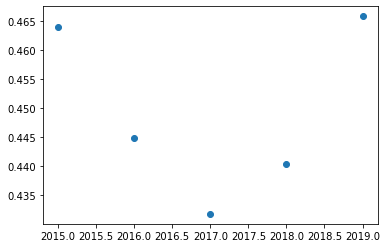

In [375]:
x = [nc_15[nc_15['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_16[nc_16['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_17[nc_17['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_18[nc_18['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_19[nc_19['GEOID'] == 37067002001]['Percent of Total Population Male']]
y = [2015, 2016, 2017, 2018, 2019]

plt.scatter(y, x)


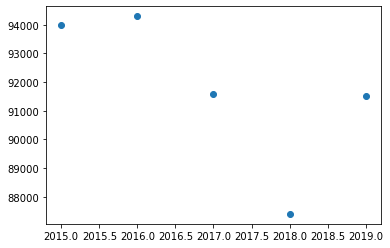

In [376]:
x = [nc_15[nc_15['GEOID'] == 37067002001]['houseval15'], nc_16[nc_16['GEOID'] == 37067002001]['houseval16'], nc_17[nc_17['GEOID'] == 37067002001]['houseval17'], nc_18[nc_18['GEOID'] == 37067002001]['houseval18'], nc_19[nc_19['GEOID'] == 37067002001]['houseval19']]
y = [2015, 2016, 2017, 2018, 2019]

plt.scatter(y, x)

In [377]:
nc_19.rename(columns={'pnhwhite19':'pnhwhite', 'pnhasn19':'pnhasn', 'pnhblk19':'pnhblk', 'phisp19':'phisp', 'medinc19':'medinc', 'rent19':'rent', 
                     'houseval19':'houseval', 'pcol19':'pcol'}, inplace=True)
nc_19.columns


Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [378]:
nc_18.rename(columns={'pnhwhite18':'pnhwhite', 'pnhasn18':'pnhasn', 'pnhblk18':'pnhblk', 'phisp18':'phisp', 'medinc18':'medinc', 'rent18':'rent', 
                     'houseval18':'houseval', 'pcol18':'pcol'}, inplace=True)
nc_18.columns


Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [379]:
nc_17.rename(columns={'pnhwhite17':'pnhwhite', 'pnhasn17':'pnhasn', 'pnhblk17':'pnhblk', 'phisp17':'phisp', 'medinc17':'medinc', 'rent17':'rent', 
                     'houseval17':'houseval', 'pcol17':'pcol'}, inplace=True)
nc_17.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [380]:
nc_16.rename(columns={'pnhwhite16':'pnhwhite', 'pnhasn16':'pnhasn', 'pnhblk16':'pnhblk', 'phisp16':'phisp', 'medinc16':'medinc', 'rent16':'rent', 
                     'houseval16':'houseval', 'pcol16':'pcol'}, inplace=True)
nc_16.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [381]:
nc_15.rename(columns={'pnhwhite15':'pnhwhite', 'pnhasn15':'pnhasn', 'pnhblk15':'pnhblk', 'phisp15':'phisp', 'medinc15':'medinc', 'rent15':'rent', 
                     'houseval15':'houseval', 'pcol15':'pcol'}, inplace=True)
nc_15.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [382]:
df = nc_19.append([nc_18, nc_17, nc_16, nc_15])

In [383]:
df.drop(columns=['tpopml', 'tpopmlt5', 'tpopml5to9',
       'tpopml10to14', 'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21',
       'tpopml22to24', 'tpopml25to29', 'tpopml30to34', 'tpopml35to39',
       'tpopml40to44', 'tpopml45to49', 'tpopml50to54', 'tpopml55to59',
       'tpopml60to61', 'tpopml62to64', 'tpopml65to66', 'tpopml67to69',
       'tpopml70to74', 'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml',
       'tpopfmlt5', 'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17',
       'tpopfml18to19', 'tpopfml20', 'tpopfml21', 'tpopfml22to24',
       'tpopfml25to29', 'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44',
       'tpopfml45to49', 'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61',
       'tpopfml62to64', 'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74',
       'tpopfml75to79', 'tpopfml80to85', 'tpopfmlgt85'], inplace=True)
df.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 

In [384]:
df.rename(columns={'tpop2':'Total Population'})
df.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 

In [385]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
tpop2,0,0.000000
hisp,0,0.000000
nhblk,0,0.000000
nhasn,0,0.000000
nhwhite,0,0.000000
Year,0,0.000000
tpop,0,0.000000
GEOID,0,0.000000
pnhblk,24,1.103448


In [393]:
df.set_index('GEOID',inplace=True)


KeyError: "None of ['GEOID'] are in the columns"

In [394]:
geoid = list(df.index.unique())
df_zero = df.fillna(0)

In [400]:
df_2019 = df.loc[df['Year']==2019]
df_2015 = df.loc[df['Year']==2015]

df_test = pd.DataFrame()
columns = []
for column in df.columns:
    columns.append(column)
for column in columns:
    lst = []
    for geo in geoid:
        val_2015 = df_2015.at[geo, column]
        val_2019 = df_2019.at[geo, column] 
        pct_change = (val_2019-val_2015)/val_2015
        lst.append(pct_change)
    df_test[column] = lst

<ipython-input-400-bd807b217cd3>:13: RuntimeWarning: divide by zero encountered in longlong_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-400-bd807b217cd3>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-400-bd807b217cd3>:13: RuntimeWarning: invalid value encountered in double_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-400-bd807b217cd3>:13: RuntimeWarning: divide by zero encountered in double_scalars
  pct_change = (val_2019-val_2015)/val_2015


In [401]:
print(df_test)

     Unnamed: 0      tpop  pnhwhite    pnhasn    pnhblk     phisp   nhwhite  \
0     -0.944444  0.275219  0.144542 -0.374325 -0.568024  0.996092  0.459542   
1     -0.994269  0.088192  0.107714 -1.000000  0.133284 -0.163231  0.205405   
2     -0.977941  0.030973 -0.195483  0.372456  0.145007 -0.209195 -0.170564   
3     -0.990719  0.130570 -0.099760  0.744984  0.083393 -0.070014  0.017784   
4     -0.988372  0.003837 -0.047938  7.280727 -0.010333 -0.060423 -0.044285   
..          ...       ...       ...       ...       ...       ...       ...   
430    0.004662  0.087667  0.001766  1.256707 -0.691229  2.735059  0.089588   
431    1.181818 -0.080467  0.011907 -0.912499  0.024145 -0.120930 -0.069519   
432    0.890830  0.024982 -0.294176       NaN -0.159716  0.708770 -0.276543   
433    4.292683  0.176315  0.044930 -0.165630 -0.078742  0.383342  0.229167   
434    0.866953 -0.080200  0.120032  0.605440 -0.172025 -0.376278  0.030206   

        nhasn     nhblk      hisp  ...  Percent of 

In [402]:
df_test['GEOID'] = geoid

In [403]:
print(df_test)

     Unnamed: 0      tpop  pnhwhite    pnhasn    pnhblk     phisp   nhwhite  \
0     -0.944444  0.275219  0.144542 -0.374325 -0.568024  0.996092  0.459542   
1     -0.994269  0.088192  0.107714 -1.000000  0.133284 -0.163231  0.205405   
2     -0.977941  0.030973 -0.195483  0.372456  0.145007 -0.209195 -0.170564   
3     -0.990719  0.130570 -0.099760  0.744984  0.083393 -0.070014  0.017784   
4     -0.988372  0.003837 -0.047938  7.280727 -0.010333 -0.060423 -0.044285   
..          ...       ...       ...       ...       ...       ...       ...   
430    0.004662  0.087667  0.001766  1.256707 -0.691229  2.735059  0.089588   
431    1.181818 -0.080467  0.011907 -0.912499  0.024145 -0.120930 -0.069519   
432    0.890830  0.024982 -0.294176       NaN -0.159716  0.708770 -0.276543   
433    4.292683  0.176315  0.044930 -0.165630 -0.078742  0.383342  0.229167   
434    0.866953 -0.080200  0.120032  0.605440 -0.172025 -0.376278  0.030206   

        nhasn     nhblk      hisp  ...  Percent of 

<AxesSubplot:>

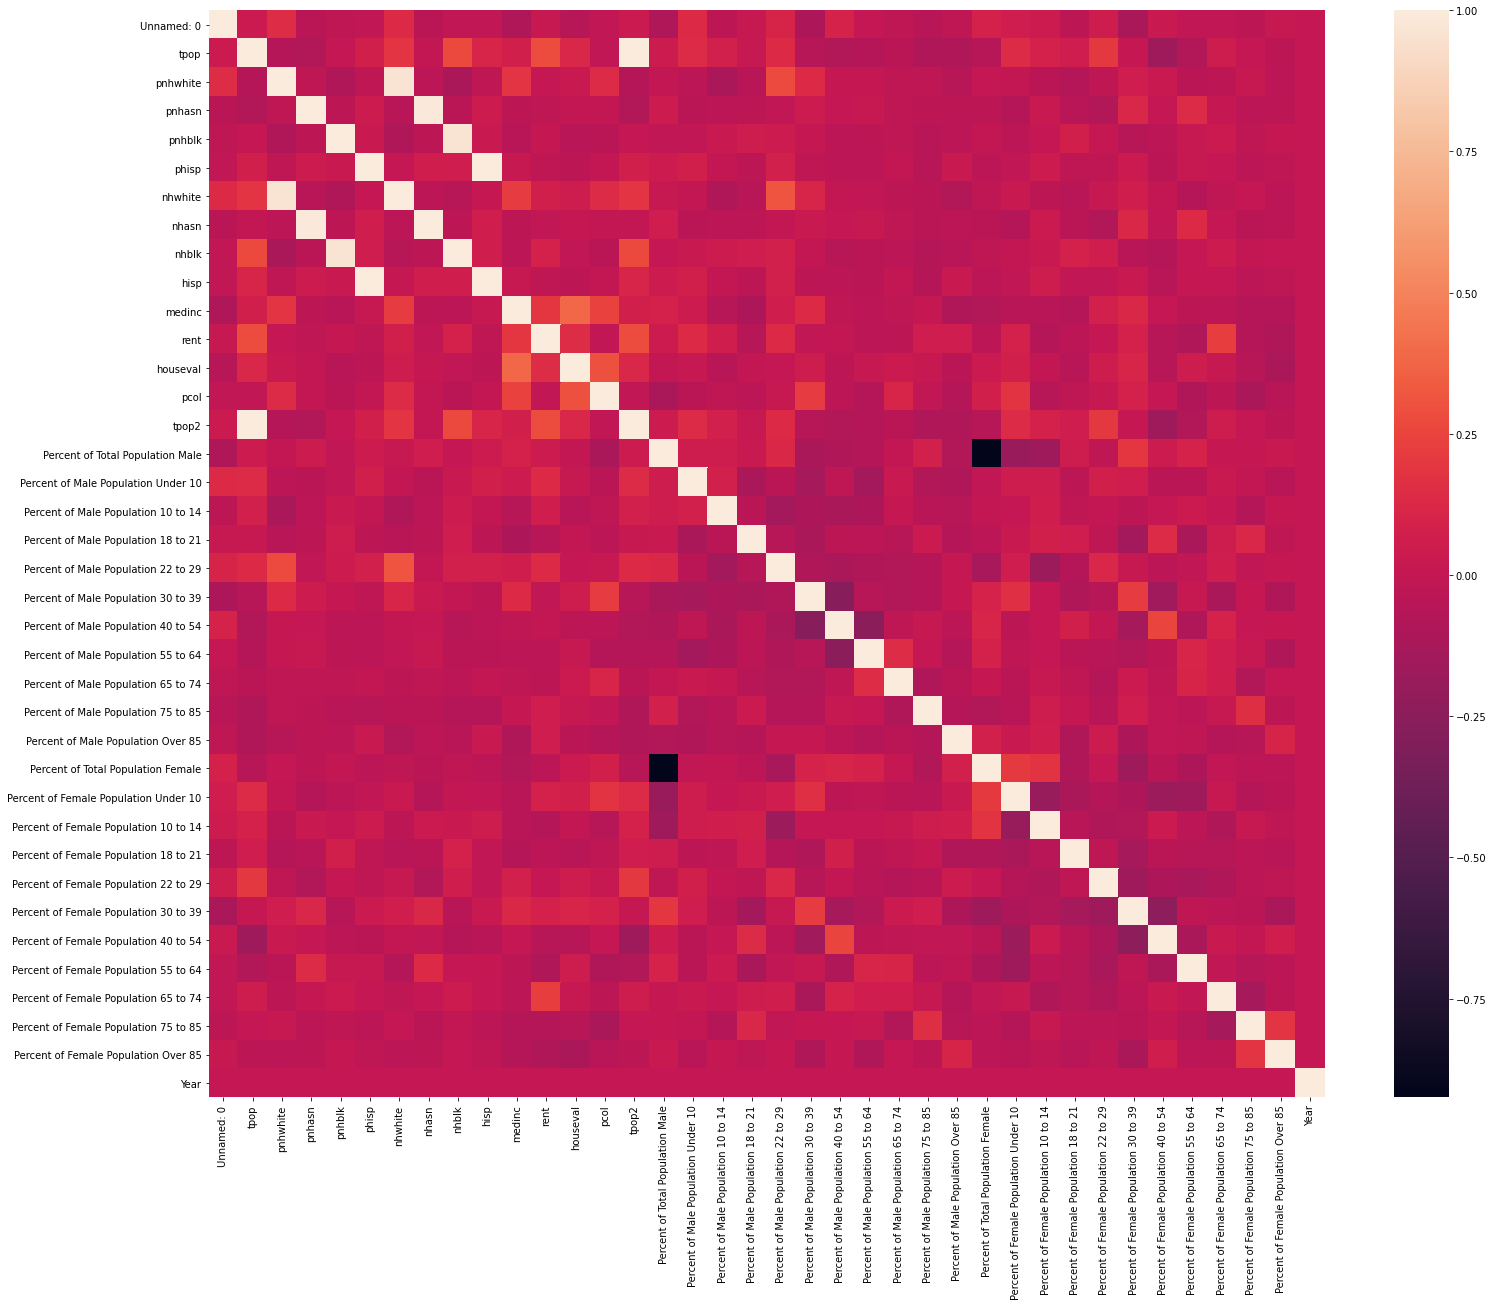

In [410]:

corr_mat = df_test.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr_mat)

In [412]:
print(corr_mat['houseval'])

Unnamed: 0                              -5.909023e-02
tpop                                     1.137403e-01
pnhwhite                                 2.703430e-02
pnhasn                                  -7.170137e-03
pnhblk                                  -4.809479e-02
phisp                                   -2.566169e-02
nhwhite                                  4.775773e-02
nhasn                                    1.126914e-02
nhblk                                   -1.417994e-02
hisp                                    -2.334332e-02
medinc                                   3.843192e-01
rent                                     1.439115e-01
houseval                                 1.000000e+00
pcol                                     2.952806e-01
tpop2                                    1.137403e-01
Percent of Total Population Male        -5.889413e-03
Percent of Male Population Under 10      1.809399e-02
Percent of Male Population 10 to 14     -5.140871e-02
Percent of Male Population 1